In [1]:
import sys

sys.path.append("../")

In [2]:
import os.path

import matplotlib.pyplot as plt
from tqdm import tqdm

from datamodules.coarse_datamodule import CoarseDataModule

import numpy as np

In [3]:
BASE_DIR = "/mnt/HDD2/flare2022/datasets/FLARE2022"

num_labels_with_bg=14

dm = CoarseDataModule(
        supervised_dir=os.path.join(BASE_DIR, "Training/FLARE22_LabeledCase50/"),
        val_ratio=0.975,
        num_labels_with_bg=num_labels_with_bg,
        ds_cache_type=None,
        batch_size=1,
        max_workers=4,
        pin_memory=False,
    )
dm.setup("validate")

In [4]:
dl = dm.val_dataloader()

In [5]:
label_seperated_intensity = []
for batch in tqdm(dl):
    image = batch["image"].flatten()
    label = batch["label"].flatten()

    for i in range(num_labels_with_bg):
        img = image[label == i]
        if len(label_seperated_intensity) == i:
            label_seperated_intensity.append(img)
        else:
            label_seperated_intensity[i] = np.concatenate((label_seperated_intensity[i], img))

100%|██████████| 50/50 [00:22<00:00,  2.20it/s]


In [6]:
import gc
gc.collect()

0

In [7]:
assert len(label_seperated_intensity) == num_labels_with_bg

In [8]:
np.unique(label)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13.], dtype=float32)

In [9]:
label_names = (
    "background",
    "liver",
    "right_kidney",
    "spleen",
    "pancreas",
    "aorta",
    "ivc",
    "rag",
    "lag",
    "gallbladder",
    "esophagus",
    "stomach",
    "duodenum",
    "left_kidney",
)

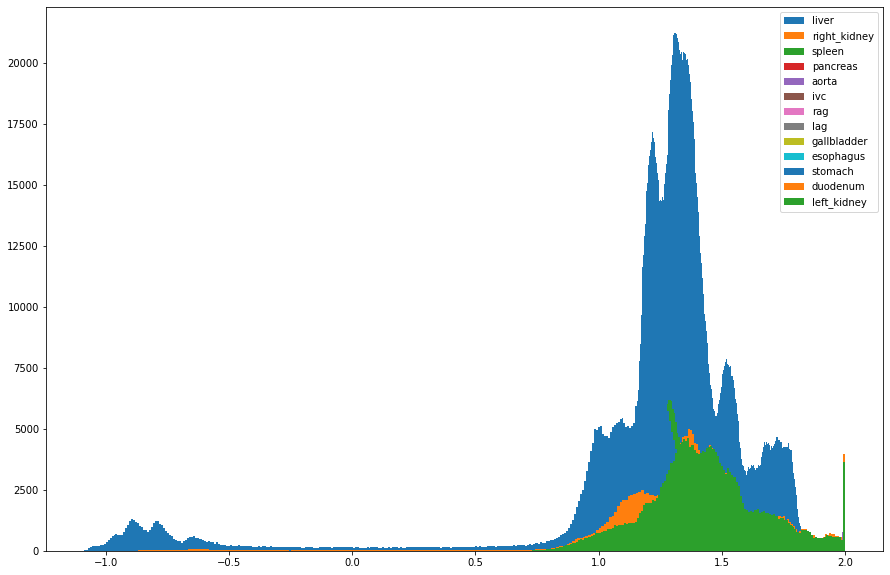

In [10]:
plt.figure(figsize=(15, 10))
start_index = 1
for lab, intensity in zip(label_names[start_index:], label_seperated_intensity[start_index:]):
    plt.hist(intensity, bins="auto", label=lab)
    # plt.title(f"Label {i}")
    # plt.show()
    # plt.close()
plt.legend();

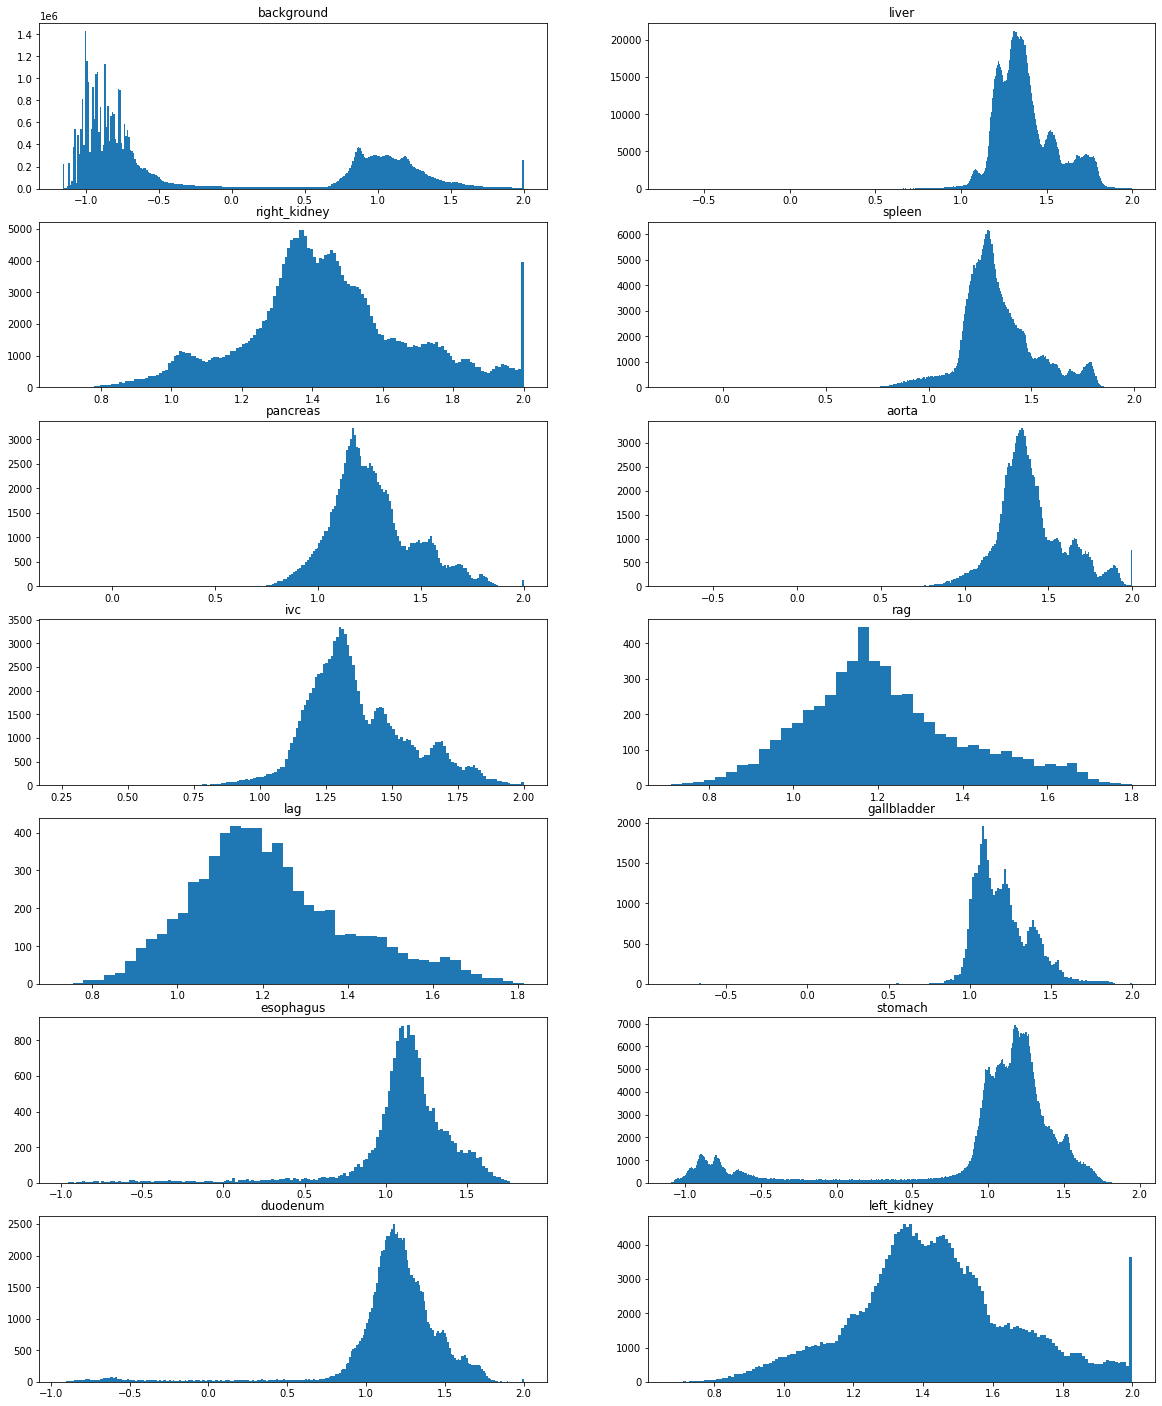

In [11]:
fig, axes = plt.subplots(7, 2, figsize=(20, 25))

for lab, intensity, ax in zip(label_names, label_seperated_intensity, axes.flat):
    ax.hist(intensity, bins="auto")
    ax.set_title(lab)

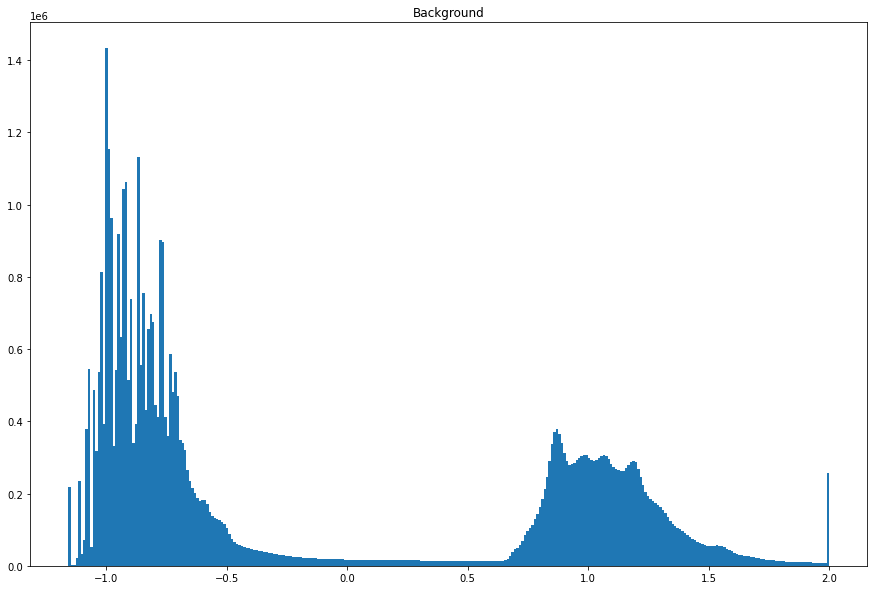

In [12]:
plt.figure(figsize=(15, 10))
plt.hist(label_seperated_intensity[0], bins="auto")
plt.title("Background");